In [1]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.decomposition import PCA

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

There are 8 news groups:
0. comp.sys.ibm.pc.hardware
1. comp.sys.mac.hardware
2. rec.autos
3. rec.motorcycles
4. sci.crypt
5. sci.electronics
6. talk.religion.misc, and
7. soc.religion.christian

# Question 1: Exploratory Analysis

In [3]:
# Training Data
training_data_location = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_train.csv')
training_data = pd.read_csv(training_data_location, delimiter=',', compression='bz2')

# Test Data
test_data_location = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_test.csv')
test_data = pd.read_csv(test_data_location, delimiter=',', compression='bz2')

In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5648 entries, 0 to 5647
Columns: 1001 entries, __ to class
dtypes: float64(1000), int64(1)
memory usage: 43.1 MB


In [5]:
training_data.describe()

,__,ability,able,ac,accept,access,according,account,act,action,...,worth,wouldn,write,written,wrong,wrote,year,years,yes,class
count,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,...,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000
mean,0.001708,0.001472,0.006335,0.002273,0.002466,0.004041,0.002923,0.001420,0.002057,0.001560,...,0.003717,0.004887,0.003494,0.002800,0.006421,0.001851,0.006020,0.008144,0.006705,3.345255
std,0.034360,0.016554,0.033866,0.026688,0.022362,0.030053,0.024208,0.018515,0.020301,0.020248,...,0.028373,0.033153,0.027797,0.025441,0.037083,0.020132,0.036011,0.037727,0.039841,2.208888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,0.956585,0.443807,0.565277,0.711480,0.529982,0.635985,0.560049,0.461537,0.657318,0.631932,...,0.614346,0.698880,0.511068,0.596214,0.751603,0.561412,0.617048,0.438414,0.736056,7.000000


In [6]:
training_data.head(10)

,__,ability,able,ac,accept,access,according,account,act,action,...,worth,wouldn,write,written,wrong,wrote,year,years,yes,class
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
6,0.0,0.0,0.0,0.0,0.000000,0.186521,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
7,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,0.0,0.182272,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Columns: 1001 entries, __ to class
dtypes: float64(1000), int64(1)
memory usage: 14.4 MB


In [8]:
test_data.describe()

,__,ability,able,ac,accept,access,according,account,act,action,...,worth,wouldn,write,written,wrong,wrote,year,years,yes,class
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,...,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,0.002292,0.002168,0.007335,0.002817,0.002701,0.004449,0.003012,0.001716,0.001886,0.001745,...,0.003018,0.005356,0.003746,0.003812,0.007960,0.001970,0.006214,0.008706,0.009449,3.345194
std,0.032391,0.021397,0.034312,0.032169,0.021777,0.032393,0.026133,0.022855,0.019504,0.018376,...,0.026231,0.033441,0.028779,0.032836,0.039182,0.020613,0.037389,0.041551,0.043570,2.208286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,0.864159,0.469412,0.337561,0.620254,0.310053,0.504324,0.420903,0.632166,0.336667,0.387412,...,0.490894,0.481298,0.434553,0.543384,0.470697,0.566179,0.537827,0.532047,0.590114,7.000000


In [9]:
test_data.head(10)

,__,ability,able,ac,accept,access,according,account,act,action,...,worth,wouldn,write,written,wrong,wrote,year,years,yes,class
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.223984,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,0.0,0.0,0.0,0.0,0.065361,0.0,0.0,0.0,0.0,0.0,...,0.0,0.058623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## Questions

**a. [5 points] Focusing first on the training set, summarise the key features/observations in the data: focus on the dimensionality, data ranges, feature and class distribution and report anything out of the ordinary. What are the typical values of the features like?**

There are 1001 key features
There are 5866 entries (1 column header)

**b. [3 points] Looking now at the Testing set, how does it compare with the Training Set (in terms of sizes and feature-distributions) and what could be the repurcussions of this?**

The testing set has 1882 entries (1 column header)

**c. [2 points] Why do you think it is useful to consider TF-IDF weights as opposed to just the frequency of times a word appears in a document as a feature?**

Some documents might be longer than others.


# Question 2: (24 points) Unsupervised Learning

**2.1. [2 points] The K-Means algorithm is non-deterministic. Explain why this is, and how the final model is selected in the SKLearn implementation of KMeans.**

Non-deterministic means that running the algorithm several times on the same data, could give different results. This is due to the algorithm's random selection of data points as initial cluster centres.

Note that the k-means implementation in scikit-learn stops early if it converges before the maximum number of iterations is reached. However, it is possible that k-means does not reach convergence for a particular run, which can be problematic (computationally expensive) if we choose relatively large values for max_iter.

**2.2. [1 point] One of the parameters we need to specify when using k-means is the number of clusters. What is a reasonable number for this problem and why?**

8 because there are 8 news groups and we want to classify which words relate/belong to which group.

**[2.3] (5 points) We will use the Adjusted Mutual Information (AMI) i.e. adjusted_mutual_info_score between the clusters and the true (known) labels to quantify the performance of the clustering. Give an expression for the MI in terms of entropy. In short, describe what the MI measures about two variables, why this is applicable here and why it might be difficult to use in practice. Hint: MI is sometimes referred to as Information Gain: note that you are asked only about the standard way we defined MI and not the AMI which is adjusted for the size of the domain and for chance agreement.**

Mutual information is the reduction in uncertainty (decrease of entropy) about one random variable given knowledge of another.

The mutual information between two variables X and Y in terms of entropy is H(X) + H(Y) - H(X,Y). In short, mutual information is the uncertainty that is common to both X and Y.

In practice (for feature selection), we would like to maximise the mutual information between the subset of selected features and target variable, however maximising it is infeasible because the set of possible combinations of features grows exponentially.

**2.4. [4 points] Fit K-Means objects with n_clusters ranging from 2 to 12. Set the random seed to 1000 and the number of initialisations to 50, but leave all other values at default. For each fit compute the adjusted mutual information (there is an SKLearn function for that). Set average_method=`max' . Plot the AMI scores against the number of clusters (as a line plot).**

In [10]:
X = training_data.drop('class', axis=1)
y = training_data['class'].values

In [11]:
# for i in range(2,3):
#     kmeans = KMeans(n_clusters=i, random_state=1000, n_init=50)
#     kmeans.fit(X)
#     adjusted_mutual_info_score(y, kmeans.labels_)

In [12]:
kmeans = KMeans(n_clusters=2, random_state=1000, n_init=50)
kmeans.fit(X)
adjusted_mutual_info_score(y, kmeans.labels_)

0.09833132888683942

In [13]:
kmeans = KMeans(n_clusters=3, random_state=1000, n_init=50)
kmeans.fit(X)
adjusted_mutual_info_score(y, kmeans.labels_)

0.19631405776174354

In [14]:
kmeans = KMeans(n_clusters=4, random_state=1000, n_init=50)
kmeans.fit(X)
adjusted_mutual_info_score(y, kmeans.labels_)

0.25620733090585357

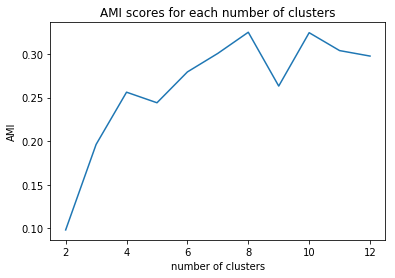

In [26]:
no_clusters = [2,3,4,5,6,7,8,9,10,11,12]
amis = []

for i in no_clusters:
    kmeans = KMeans(n_clusters=i, random_state=1000, n_init=50)
    kmeans.fit(X)
    ami = adjusted_mutual_info_score(y, kmeans.labels_)
    amis.append(ami)

# Plot a graph
plt.figure()
plt.axes()
plt.plot(no_clusters, amis)
plt.title("AMI scores for each number of clusters")
plt.xlabel("number of clusters")
plt.ylabel("AMI");

In [17]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

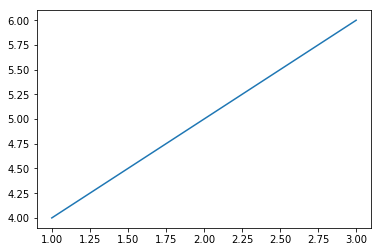

In [19]:
plt.plot([1,2,3],[4,5,6])

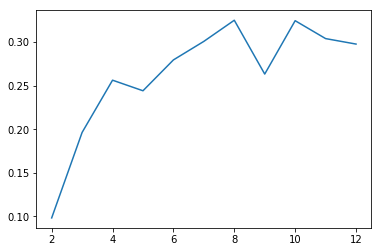

In [22]:
fig = plt.figure()
ax = plt.axes()
a = [0.09833132888683942,
0.19631405776174354,
0.25620733090585357,
0.2440905472039343,
0.27944383003358997,
0.30069857238308845,
0.32492151949761094,
0.2632306743098964,
0.3244013254498837,
0.3038880068206468,
0.2976031041980303,
]

i = [2,3,4,5,6,7,8,9,10,11,12]

ax.plot(i, a)

**2.5. [3 points] Discuss any trends and interesting aspects which emerge from the plot. Does this follow from your expectations?**

Yes, it does. Since there are 8 newsgroups, I expected that the AMI score will be the highest when there are 8 clusters.

**2.6. [6 points] Let us investigate the case with four (4) clusters in some more detail. Using seaborn's countplot function, plot a bar-chart of the number of data-points with a particular class (encoded by colour) assigned to each cluster centre (encoded by position on the plot's x-axis). As part of the cluster labels, include the total umber of data-points assigned to that cluster.**

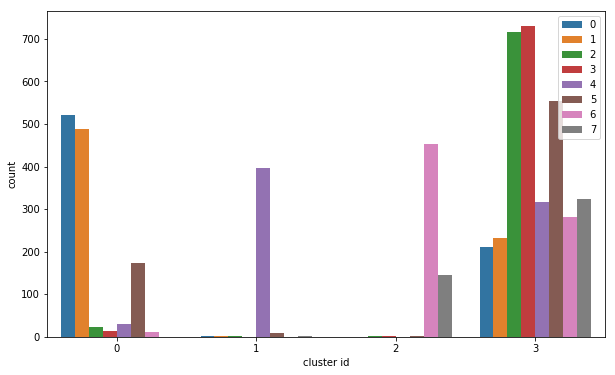

In [29]:
kmeans = KMeans(n_clusters=4, random_state=1000, n_init=50)
kmeans.fit(X)
adjusted_mutual_info_score(y, kmeans.labels_)

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x=kmeans.labels_, hue=y, ax=ax)
plt.xlabel('cluster id')
plt.show()

**2.7. [3 points] How does the clustering in Question2:(f) align with the true class labels? Does it conform to your observations in Q 2(e)?**

There are 4 bigger subgroups that you can generalise from the 8 newsgroups 
1. electronics (class 0, 1 and 5)
2. automotive (class 2 and 3)
3. religion (class 6 and 7)
3. cryptography (class 4)

and they were the biggest data points for each of the 4 clusters.

The clustering has worked well and the labels are indicative of the difference in the data, since each cluster has dominant labels that correlate to the subgroups.

## Question 3: (26 points) Logistic Regression Classification

We will now try out supervised classification on this data. We will focus on Logistic Regression and measure performance in terms of the F1 score (familiarise yourself with this score which is related to the precision and recall scores that we learnt about in class).

In most cases, we will need to validate hyper-parameters: to this end, we will use K-Fold cross validation. Using the provided SKLearn implementation for StratifiedKFold, create a 10-Fold stratified split of the data. Make sure to set the random state to 0 for reproducibility, and turn on shuffling. We will use the same splits provided by this throughout this question.

**3.1. [3 points] What is the F1-score, and why is it preferable to accuracy in our problem?
How does the macro-average work to extend the score to multi-class classification?**

The F1-score is the 2*((precision * recall)/(precision + recall)). It conveys the balance between the precision and the recall. It is more preferable to use accuracy in our porblem because false positives and false negatives have similar cost and we have relatively even classes.

To calculate the classifier's overall F1-score combine the per-class F1-scores into a single number. The simplest way to do that is to is to compute an arithmetic mean of the per-class F1-scpres, called the macro-average.

**3.2. [2 points] As always we start with a simple baseline classifier. Define such a classifier (indicating why you chose it) and report its performance on the Test set. Use the `macro'
average for the f1_score.**

Predict the same class for every data point - the class with the highest prior probability. This should give minimum 20% accuracy, and possibly considerably better if one class occurs significantly more often than the others.

In [30]:
# TEST SET - test_data


y_test_baseline = test_data['class']
_, items_per_class = np.unique(y_test_baseline, return_counts=True)
class_with_most_items = np.max(items_per_class)
baseline_accuracy = class_with_most_items.astype('float') / len(y_test_baseline)

baseline_accuracy

0.13223579394583113